In [82]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

In [83]:
# Task 1: Simple Linear Regression
# ● Use the scikit-learn library.
# ● Load the California Housing Dataset (or any house price dataset).
# ● Predict the house price using a single feature (e.g., number of rooms).
# ● Train a simple linear regression model.
# ● Plot the regression line using matplotlib.

In [84]:
#b) Load the dataset
df = pd.read_csv("C:/Users/Admin/Downloads/housing.csv")
X = df[['total_rooms']]  
y = df['median_house_value']

In [98]:
#c) d)  Predict and Train the Model
X_train, X_test, y_train, y_test = train_test_split(X, y,train_size = 0.8)
model = LinearRegression()
model.fit(X_train, y_train)
y_predict = model.predict(X_test)
print("X   |    Predicted Y")
print("-------------------------------------------------------------------------")
for i in range(len(X_test)):
    print(X_test.iloc[i,0], "  ", y_predict[i])



X   |    Predicted Y
-------------------------------------------------------------------------
1427    197646.7314126058
927    194045.46746481876
5950    230223.76508428712
2055    202169.91893102627
2673    206621.08117049103
1751    199980.35045077177
1914    201154.36249775032
1968    201543.29900411132
2915    208364.09292121994
1802    200347.67937344604
5756    228826.47467254577
2426    204842.05678028424
3249    210769.73723834165
1798    200318.86926186373
1676    199440.16085860372
1385    197344.22524099165
3574    213110.55880440323
84    187973.73644884984
2877    208090.3968611881
2316    204049.7787117711
1254    196400.69408667146
431    190473.01362861405
205    188845.2423242143
925    194031.0624090276
9374    254885.22059873262
873    193656.53095845776
2485    205267.0059261231
1227    196206.22583349096
955    194247.13824589484
827    193325.21467526135
4134    217143.97442592468
3626    213485.09025497307
1985    201665.7419783361
2267    203696.85484488797
217

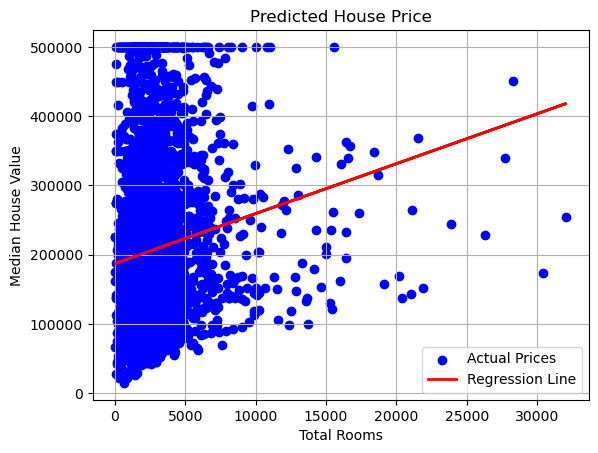

In [99]:
#e) Plot the Regression Line
plt.scatter(X_test, y_test, color='blue',label='Actual Prices')
plt.plot(X_test, y_predict, color='red', label='Regression Line', linewidth=2)
plt.title('Predicted House Price')
plt.xlabel('Total Rooms')
plt.ylabel('Median House Value')
plt.legend()
plt.grid()
plt.show()

In [ ]:
# Task 2: Multiple Linear Regression
# ● Use the same dataset or load another dataset with at least 4 numeric features.
# ● Predict the target variable using multiple independent variables.
# ● Evaluate the model using:
# ○ R-squared
# ○ Mean Squared Error (MSE)
# ○ Root Mean Squared Error (RMSE)
# ● Display the coefficients of each feature.

In [100]:
#a) Load the Dataset
features = ['total_rooms', 'total_bedrooms', 'population', 'median_income']
X = df[features].dropna()
y = df['median_house_value'][X.index]  # align y with X

In [120]:
# Train the Model and Predict the Values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Total Rooms  |  Total Bedrooms  |  Population  |  Median Income   |  Actulal Y  |  Predicted Y")
print("-------------------------------------------------------------------------------------------------")
for i in range(len(X_test)):
    x_values = "            ".join(map(str, X_test.iloc[i].values))
    print(f"{x_values}            {y_pred[i]:.2f}      {y_test.iloc[i]:.2f}")


Total Rooms  |  Total Bedrooms  |  Population  |  Median Income   |  Actulal Y  |  Predicted Y
-------------------------------------------------------------------------------------------------
961.0            278.0            525.0            3.1838            187839.29      245800.00
6403.0            1116.0            3327.0            4.4871            206213.73      137900.00
3731.0            853.0            2313.0            3.2237            187460.23      218200.00
1260.0            276.0            707.0            2.892            161285.47      220800.00
2171.0            597.0            928.0            4.1016            253584.12      170500.00
855.0            189.0            716.0            2.0375            113340.23      75000.00
3075.0            564.0            1633.0            5.2528            261655.74      269400.00
2228.0            399.0            1159.0            4.8906            245305.10      228900.00
2471.0            349.0            881.0      

In [121]:
#Evaluation
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("Evaluation Metrics:")
print(f"R² Score: {r2:.4f}")
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")

Evaluation Metrics:
R² Score: 0.5243
MSE: 6505051255.1584
RMSE: 80653.8980


In [122]:
#Display Coefficients of each Feature
for i in range(len(features)):
    print(f"{features[i]}: {model.coef_[i]:.2f}")

total_rooms: -25.55
total_bedrooms: 196.49
population: -24.89
median_income: 47949.83


In [ ]:
# Task 3: Feature Scaling and Normalization
# ● Demonstrate the effect of standardizing features using StandardScaler.
# ● Compare model performance before and after scaling.

In [128]:
#Model without scaling 
X_train1, X_test1, y_train, y_test = train_test_split(X, y,train_size=0.8)
model1 = LinearRegression()
model1.fit(X_train_raw, y_train)
y_pred1 = model1.predict(X_test1)

#Standardize features
scaler = StandardScaler()
X2 = scaler.fit_transform(X)
X_train2, X_test2, _, _ = train_test_split(X2, y,train_size=0.8)
model2 = LinearRegression()
model2.fit(X_train2, y_train)
y_pred2 = model2.predict(X_test2)



In [129]:
# Compare performance
def evaluate(y_true, y_pred):
    r2 = r2_score(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    print(f"R² Score: {r2:.4f}")
    print(f"MSE: {mse:.2f}")
    print(f"RMSE: {rmse:.2f}")

print("Before Scaling:")
evaluate(y_test, y_pred1)
print("\nAfter Scaling")
evaluate(y_test, y_pred2)


Before Scaling:
R² Score: 0.0170
MSE: 13283382236.92
RMSE: 115253.56

After Scaling
R² Score: -0.0010
MSE: 13527152729.67
RMSE: 116306.29


In [ ]:
# Task 4: Model Interpretation
# ● Write Python code to:
# ○ Show the correlation matrix using a heatmap.
# ○ Identify which features have the strongest relationship with the target.
# ○ Discuss multicollinearity and how it might affect regression.

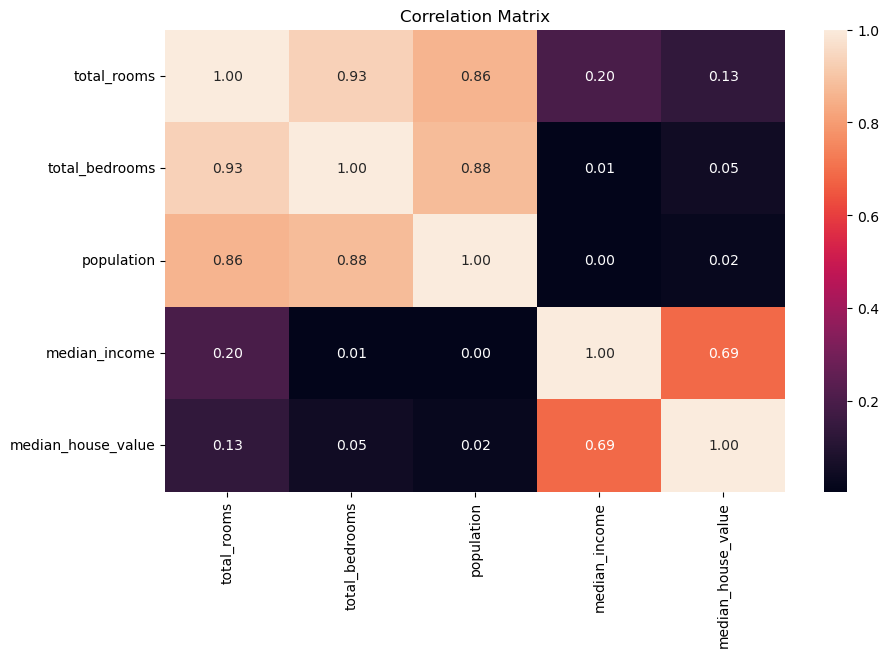

In [135]:

# a) Correlation Matrix using Heatmap
matrix = df[features + ['median_house_value']].corr().abs()
plt.figure(figsize=(10, 6))
sns.heatmap(matrix,annot=True,fmt='.2f')
plt.title("Correlation Matrix")
plt.show()

In [133]:
# b) Strongest correlations with the target
corr =matrix['median_house_value'].drop('median_house_value').sort_values(ascending=False)
print("Correlation with Target (median_house_value):")
print(corr)

Correlation with Target (median_house_value):
median_income     0.688075
total_rooms       0.134153
total_bedrooms    0.049686
population       -0.024650
Name: median_house_value, dtype: float64


In [137]:
# c) Multicollinearity
x_const = add_constant(X) 
print("Variance Inflation Factor (VIF):")
for i in range(1, X_const.shape[1]): 
    vif = variance_inflation_factor(x_const.values, i)
    print(f"{x_const.columns[i]}: {vif:.2f}")

Variance Inflation Factor (VIF):
total_rooms: 11.63
total_bedrooms: 11.54
population: 4.68
median_income: 1.48
